# Example of use of model-solver
To import MNAModel you need the following packages installed:
* os
* NumPy
* NetworkX
* Pyvis
* SciPy
* Pandas
* SymEngine
* Numba
* collections

## Load class and initialize class

In [1]:
import pandas as pd
import src.model_solver as ms
from IPython.display import display, HTML

Defining lists of equations and endogenous variables as lists. These are what together *define* a particular MNAModel class instance.

In [2]:
equations = [
    'x1 = a1',
    'x2 = a2',
    '0.2*x1+0.7*x2 = 0.1*ca+0.8*cb+0.3*i1',
    '0.8*x1+0.3*x2 = 0.9*ca+0.2*cb+0.1*i2',
    'k1 = k1(-1)+i1',
    'k2 = k2(-1)+i2'
    ]
endogenous = ['x1', 'x2', 'ca', 'cb', 'k1', 'k2']

Initiate instance of MNAModel class called *model*.

In [3]:
model = ms.ModelSolver(equations, endogenous)

Initializing model...
* Importing equations
* Importing endogenous variables
* Analyzing model...
	* Analyzing equation strings
	* Generating bipartite graph connecting equations and endogenous variables
	* Finding maximum bipartite match (MBM) (i.e. associating every equation with exactly one endogenus variable)
	* Generating directed graph (DiGraph) connecting endogenous variables using bipartite graph and MBM
	* Finding condensation of DiGraph (i.e. finding minimum simulataneous equation blocks)
	* Generating simulation code (i.e. block-wise symbolic objective function, symbolic Jacobian matrix and lists of endogenous and exogenous variables)
Finished


In [4]:
model.show_blocks()

************************************************** Block 0 ************************************************** 

Endogenous (1 variables):
k2

Exogenous (2 variables):
k2(-1) i2

Equations (1 equations):
k2 = k2(-1)+i2
************************************************** Block 1 ************************************************** 

Endogenous (1 variables):
k1

Exogenous (2 variables):
k1(-1) i1

Equations (1 equations):
k1 = k1(-1)+i1
************************************************** Block 2 ************************************************** 

Endogenous (1 variables):
x2

Exogenous (1 variables):
a2

Equations (1 equations):
x2 = a2
************************************************** Block 3 ************************************************** 

Endogenous (1 variables):
x1

Exogenous (1 variables):
a1

Equations (1 equations):
x1 = a1
************************************************** Block 4 ************************************************** 

Endogenous (2 variables):
cb ca

Exogenous (

Make Pandas dataframe. Data contains exogenous variables and initial values for endogenous variables.

In [5]:
input_data = pd.DataFrame({'x1': [2,4,1,2], 'x2': [2,1,2,3], 'ca': [1,3,4,1], 'cb': [1,2,1,4], 'k1': [1,3,4,1], 'k2': [1,2,1,4],
                           'a1': [1,2,4,4], 'a2': [3,2,3,4], 'i1': [1,2,4,4], 'i2': [3,2,3,4]}, index=['2019Q1', '2019Q2', '2020Q3', '2020Q4'], dtype=float)
input_data

,x1,x2,ca,cb,k1,k2,a1,a2,i1,i2
2019Q1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0
2019Q2,4.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
2020Q3,1.0,2.0,4.0,1.0,4.0,1.0,4.0,3.0,4.0,3.0
2020Q4,2.0,3.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0


Run model instance with respect to data.

In [6]:
solution = model.solve_model(input_data)
solution

Solving model...
	First period: 2019Q2, last period: 2020Q4
	Solving 2019Q2 2020Q3 2020Q4 
Finished


,x1,x2,ca,cb,k1,k2,a1,a2,i1,i2
2019Q1,2.0,2.0,1.000000,1.000000,1.0,1.0,1.0,3.0,1.0,3.0
2019Q2,2.0,2.0,1.942857,1.257143,3.0,3.0,2.0,2.0,2.0,2.0
2020Q3,4.0,3.0,3.857143,1.642857,7.0,6.0,4.0,3.0,4.0,3.0
2020Q4,4.0,4.0,3.885714,2.514286,11.0,10.0,4.0,4.0,4.0,4.0


Make graph plot of some variable showing what block it's in what blocks is it's ancestors and decendants.

Graph of block containing ca with <=5 generations of ancestors and <=5 generations of decendants: DiGraph with 7 nodes and 6 edges


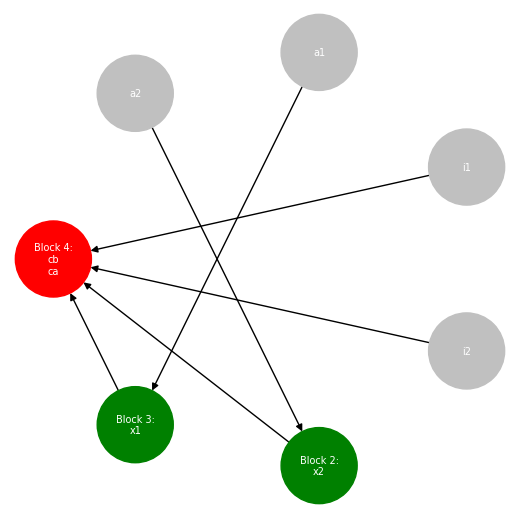

In [7]:
model.draw_blockwise_graph('ca', 5, 5, 10, False, False)